In [3]:
import math
import pandas as pd
import tqdm
import numpy as np

import torch
import torch.utils.data as data
import torch.optim as optim

from MINE import controller, datasets, losses, models

<module 'MINE.datasets' from '/home1/irteam/users/siyeong/playground/Deconstructing-MINE/MINE/datasets.py'>

In [4]:
def experiment(number_of_cases=20, iterations=1000):
    data_loader = data.DataLoader(
        datasets.CorrelatedGaussianDataset(
            dim=number_of_cases,
            rho=0.75,
            transform=datasets.TransformToTensor()
        ),
        batch_size=64,
    )
    loss = losses.imine_loss(target_value=0, regularizer_weight=0.1, distance_measure='l2')
    network = models.ConcatNet(number_of_cases, 256)
    optimizer = optim.Adam(network.parameters(), lr=5e-4)

    agent = controller.MINEController(
        data_loader=data_loader, loss=loss, network=network, optimizer=optimizer
    )
    
    agent.to(0)
    agent.train()
    for i in tqdm.tqdm(range(iterations)):
        agent.step()

    return agent

In [5]:
agent = experiment(number_of_cases=1, iterations=2000)

100%|██████████| 2000/2000 [01:44<00:00, 19.10it/s]


<IPython.core.display.Javascript object>


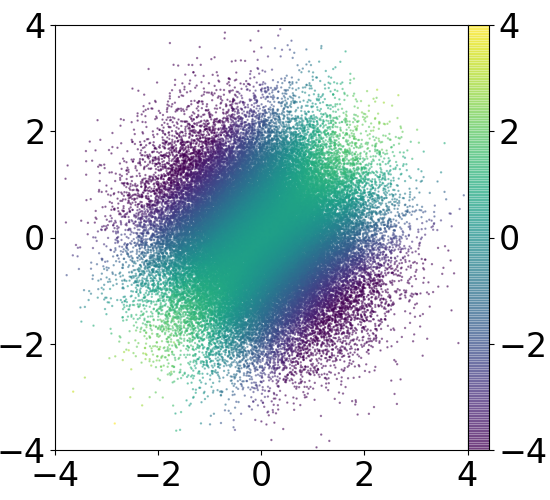

/home1/irteam/users/siyeong/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', size=24)

df = agent.history[64000:]
plt.figure(figsize=(5.5, 5))

plt.scatter(
    df.x_marginal_sample,
    df.y_marginal_sample,
    c=df.marginal_value,
    s=0.5,
    alpha=0.5,
)
colo = plt.colorbar(ax=plt.gcf().axes)
colo.ax.set_position([0.85, 0.10, 0.7, 0.85])

plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.clim(-4, 4)
plt.xticks([-4, -2, 0, 2, 4])
plt.yticks([-4, -2, 0, 2, 4])

plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.85, bottom=0.1, top=0.95)
plt.show()

<IPython.core.display.Javascript object>


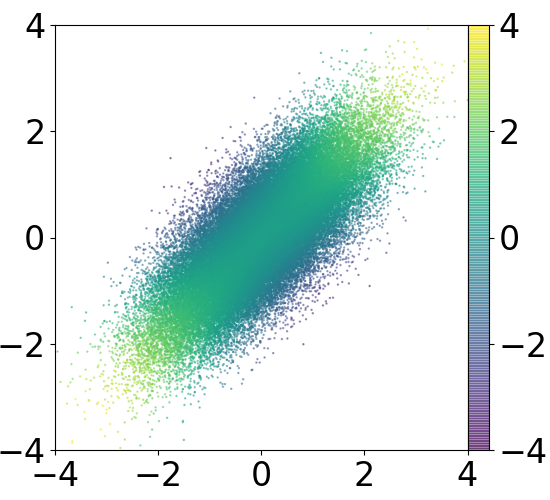

/home1/irteam/users/siyeong/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt

matplotlib.rc('font', size=24)

plt.figure(figsize=(5.5, 5))

plt.scatter(
    df.x_joint_sample,
    df.y_joint_sample,
    c=df.joint_value,
    s=0.5,
    alpha=0.5,
)
colo = plt.colorbar(ax=plt.gcf().axes)
colo.ax.set_position([0.85, 0.10, 0.7, 0.85])

plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.clim(-4, 4)
plt.xticks([-4, -2, 0, 2, 4])
plt.yticks([-4, -2, 0, 2, 4])

plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.85, bottom=0.1, top=0.95)
plt.show()